In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("fe_application_train.csv")

In [3]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X = pd.get_dummies(X, drop_first=True)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [5]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
!pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   -------------------------------------- - 524.3/549.1 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 549.1/549.1 kB 1.1 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap

In [9]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

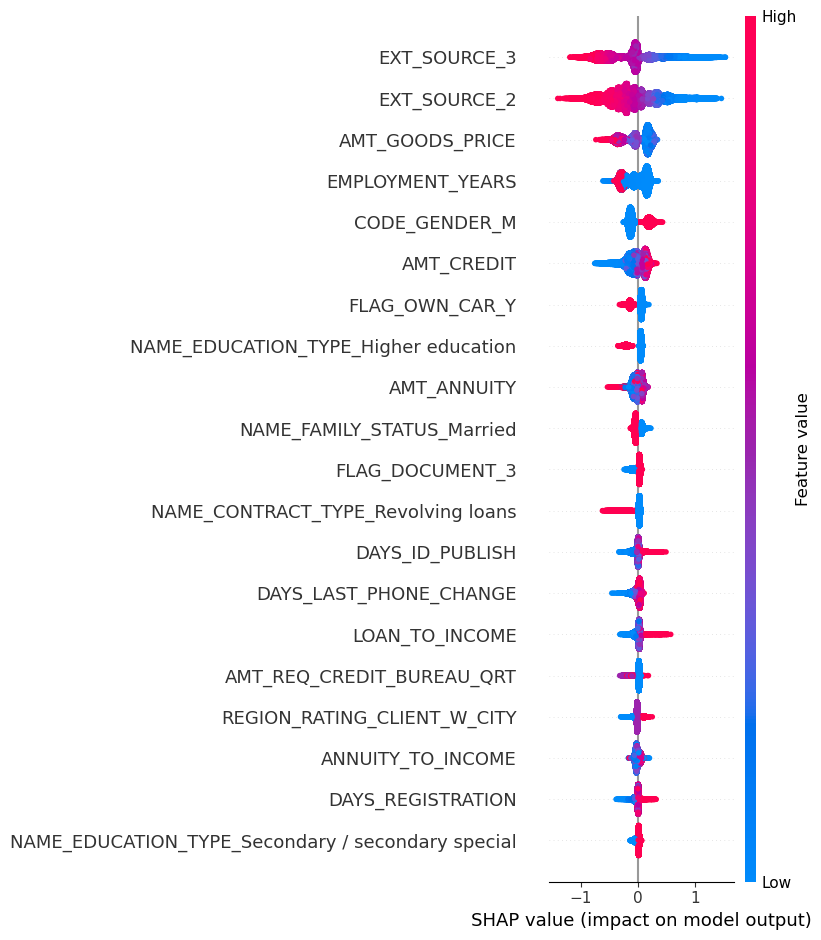

In [10]:
shap.summary_plot(shap_values, X_test)

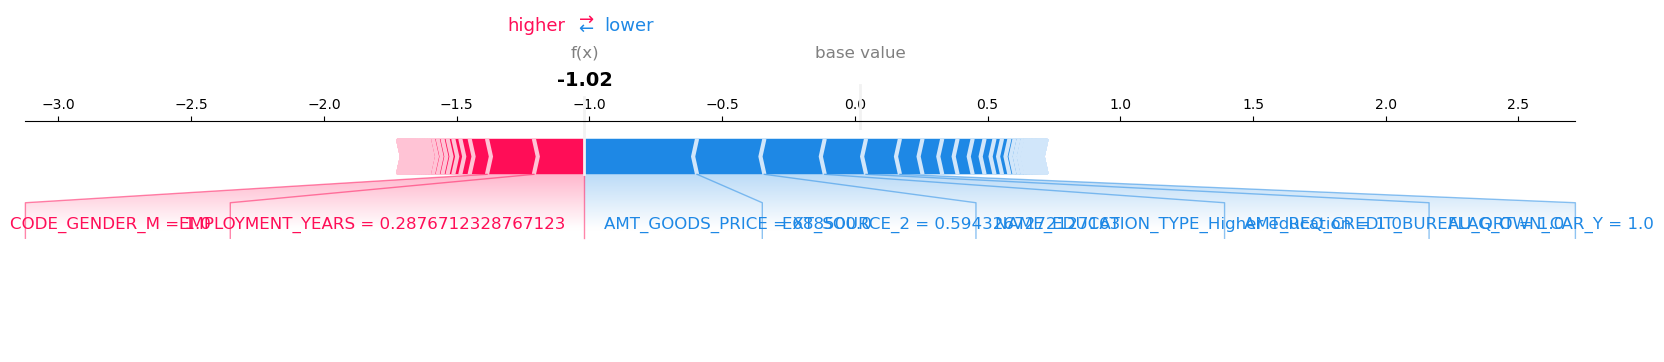

In [11]:
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test.iloc[0],
    matplotlib=True
)

In [ ]:
## Business Impact Calculation
### Assumptions

#- Average loan amount per customer: ₹5,00,000
#- Percentage of high-risk customers identified by model: 10%
#- Expected default reduction through intervention: 15%


In [ ]:
### Business Impact

#By proactively identifying high-risk loan applicants, the credit risk model
#enables banks to take preventive actions such as stricter approval criteria
#or customer intervention. This can significantly reduce loan defaults,
#minimize financial losses, and improve overall portfolio quality.
